# A Look at The Gaming Industry (Genres and Releases)
This notebook will be used for the main part of the project, that is analyzing the data for the genres, the release years, and the scores. For the sales data analysis, please check out A Look at The Gaming Industry (Sales).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from itertools import chain
from helpers import *
%matplotlib inline

df = pd.read_csv('./ign.csv')


print("Dataset Shape: {}".format(df.shape))
df.head()

Dataset Shape: (18625, 11)


,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [2]:
# Dropping unneccessary columns
df.drop(['score_phrase', 'url'], axis=1, inplace=True)

df.rename(columns={'Unnamed: 0': 'game_id'}, inplace=True)

# Most rows are completely full, therefore I am going with deleting about 40 rows out of 18625
df = df.dropna()

# 1970 happens to only have 1 game, therefore I am not including that row
df = df[df.release_year != 1970]

print("Dataset Shape: {}".format(df.shape))
df.head()

Dataset Shape: (18588, 9)


,game_id,title,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012,9,12
3,3,NHL 13,Xbox 360,8.5,Sports,N,2012,9,11
4,4,NHL 13,PlayStation 3,8.5,Sports,N,2012,9,11


### I will start by some basic analysis, to get a feel for the data

In [3]:
df.describe()

,game_id,score,release_year,release_month,release_day
count,18588.000000,18588.000000,18588.000000,18588.000000,18588.000000
mean,9306.783086,6.950769,2006.510598,7.140198,15.602216
std,5375.899857,1.712087,4.580990,3.476850,8.692034
min,0.000000,0.500000,1996.000000,1.000000,1.000000
25%,4651.750000,6.000000,2003.000000,4.000000,8.000000
50%,9298.500000,7.300000,2007.000000,8.000000,16.000000
75%,13959.250000,8.200000,2010.000000,10.000000,23.000000
max,18624.000000,10.000000,2016.000000,12.000000,31.000000


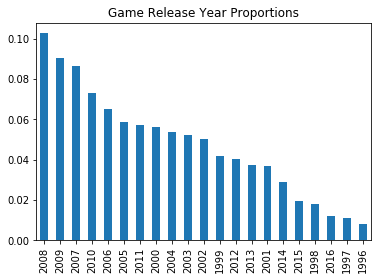

In [4]:
status_vals = df.release_year.value_counts()  
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Game Release Year Proportions"); # 10% of games are released in 2008

In [5]:
df.groupby("release_year").mean().sort_values("score")

,game_id,score,release_month,release_day
release_year,,,,
1996,480.953020,6.161745,11.046980,22.724832
2008,11363.711891,6.452960,7.319015,15.289157
1997,657.868293,6.566341,7.385366,15.234146
2007,9607.321295,6.629763,7.148817,16.020548
2000,2391.284211,6.693589,7.113876,15.793301
2006,8195.877483,6.732864,7.484272,15.852649
2009,13168.392751,6.839513,6.657754,15.093286
1998,920.365782,6.930678,8.368732,16.112094
2010,14694.797935,6.931047,6.637906,14.848820


In [6]:
df.groupby("genre").mean().sort_values("score")

,game_id,score,release_year,release_month,release_day
genre,,,,,
"Hunting, Action",9481.500000,2.000000,2007.000000,7.000000,17.000000
"Sports, Fighting",17363.000000,2.700000,2013.000000,11.000000,22.000000
"Educational, Trivia",10181.500000,3.000000,2007.000000,11.000000,10.500000
"Sports, Editor",2156.000000,3.000000,2000.000000,5.000000,24.000000
"Adventure, Adult",17071.000000,4.100000,2013.000000,7.000000,10.000000
Baseball,17706.000000,4.500000,2014.000000,4.000000,15.000000
"Educational, Productivity",11572.200000,4.660000,2008.000000,8.400000,15.600000
"Fighting, Adventure",6347.000000,4.900000,2004.400000,5.000000,5.000000
"Shooter, Adventure",18597.000000,4.900000,2016.000000,7.000000,13.000000


### Some genres are duplicated. For example there is "Hunting", "Hunting, Action", and "Action". I fix that below.

In [7]:
new_df = pd.DataFrame(df.genre.str.split(', ').tolist(), index=[df.game_id, df.title, df.platform, df.score,
                                                                  df.editors_choice, df.release_year, 
                                                                  df.release_month, df.release_day]).stack()
new_df = new_df.reset_index([0, 'game_id', 'title', 'editors_choice', 'score', 
                             'release_year', 'release_month', 'release_day', 'platform'])
new_df = new_df.rename(columns={0: 'genre'})

df = new_df
print("Dataset Shape: {}".format(df.shape))
df.head()

Dataset Shape: (21204, 9)


,game_id,title,platform,score,editors_choice,release_year,release_month,release_day,genre
0,0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Y,2012,9,12,Platformer
1,1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Y,2012,9,12,Platformer
2,2,Splice: Tree of Life,iPad,8.5,N,2012,9,12,Puzzle
3,3,NHL 13,Xbox 360,8.5,N,2012,9,11,Sports
4,4,NHL 13,PlayStation 3,8.5,N,2012,9,11,Sports


In [8]:
df.groupby("genre").mean().sort_values("score")

,game_id,score,release_year,release_month,release_day
genre,,,,,
Casino,6601.903226,5.129032,2004.129032,8.193548,16.483871
Adult,12705.000000,5.400000,2009.333333,6.000000,5.666667
Golf,18205.000000,5.500000,2015.000000,7.000000,14.000000
Hunting,7832.408696,5.668696,2004.886957,8.069565,15.269565
Other,8014.260870,5.678261,2004.782609,7.739130,16.260870
Party,10195.197183,5.855634,2007.330986,7.514085,14.873239
Productivity,11362.413043,5.884783,2008.021739,7.500000,15.086957
Word Game,11130.166667,5.950000,2009.666667,8.000000,10.166667
Virtual Pet,10584.243902,6.026829,2007.439024,6.646341,15.146341


In [9]:
# It can be noticed that there is a "Hardware" genre, upon further inspection, it seems that IGN allows users to
# rate gaming harware like the "HTC Vive" etc. Similary, there are "Editor" entries for editing software.
# I am dropping those entries
df = df[df.genre != 'Hardware']
df = df[df.genre != 'Editor']

In [10]:
df.groupby("genre").mean().sort_values("score")

,game_id,score,release_year,release_month,release_day
genre,,,,,
Casino,6601.903226,5.129032,2004.129032,8.193548,16.483871
Adult,12705.000000,5.400000,2009.333333,6.000000,5.666667
Golf,18205.000000,5.500000,2015.000000,7.000000,14.000000
Hunting,7832.408696,5.668696,2004.886957,8.069565,15.269565
Other,8014.260870,5.678261,2004.782609,7.739130,16.260870
Party,10195.197183,5.855634,2007.330986,7.514085,14.873239
Productivity,11362.413043,5.884783,2008.021739,7.500000,15.086957
Word Game,11130.166667,5.950000,2009.666667,8.000000,10.166667
Virtual Pet,10584.243902,6.026829,2007.439024,6.646341,15.146341


### Now let us take a look at general correlations

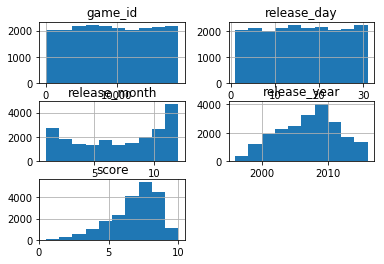

In [11]:
df.hist();

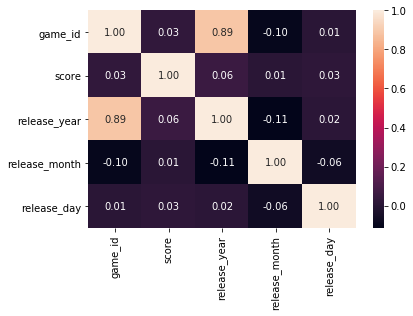

In [12]:
sns.heatmap(df.corr(), annot=True, fmt=".2f"); # Note that this does not include categorical data

# We can see a slight correlation between release dates and the score. This we will invistigate more.

### Let us now build the model, and take care of categorical data by adding dummy columns

In [ ]:
# The functions can be found in the file 
X, y = clean_data(df)
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = build_linear_mod(X, y)

In [ ]:
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)